# 12. K-Vizinhos Mais Próximos

### O Modelo

* Os KNN é um dos modelos preditivos mais simples que existe.
* Não possui premissas matemáticas.
* Ele requer:
  * Uma noção de distância
  * Uma premissa de que pontos que estão perto um do outro são similares.
  

* Algoritmos de ML geralmente consideram o conjunto de dados como um todo afim de aprender padrões.
* O KNN rejeita concientemente muitas das informações do conjunto de dados, uma vez que, a previsão para cada novo ponto depende somente de alguns pontos mais próximos.
* O KNN não ajudam a entender os fatores determinantes para os fenômenos estudados (não ajuda a ter uma noção de causa e efeito).
* Em geral, temos alguns pontos de dados e um conjunto de rótulos correspondentes. Para o exemplo, esse pontos de dados serão vetores.
* Escolhemos um número k como, por exemplo, 3 ou 5. Quando queremos classificar alguns novos pontos de dados, encontramos os pontos rotulados k mais próximos e os deixamos votar na saída.
* Para tal, necessitamos de uma função para contar esses votos. Uma forma seria:

In [2]:
from collections import Counter

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [1]:
# Funções Auxiliares 
from Codigos.linear_algebra import vector_subtract, dot, sum_of_squares, magnitude, distance
from Codigos.stats import mean

* Isso não realiza nada de inteligente com as relações. Temos outras 3 alternativas:
  * Escolher um dos vencedores aleatoriamente.
  * Ponderar os votos à distância e escolher o vencedor mais votado. 
  * Reduzir k até encontrarmos um único vencedor.
  
  
* Implementação do terceiro:

In [3]:
def majority_vote(labels):
    """presume que as etiquetas são ordenadas do mais próximo para o mais distante"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])
    if num_winners == 1:
        return winner    # vencedor único, então o devolve
    else:
        return majority_vote(labels[:-1]) # tenta novamente sem o mais distante

* Com a função acima é fácil criar um classificador:

In [32]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda labeled_points: distance(labeled_points[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

* Agora uma exemplo para ver como isso funciona.

#### Exemplo: Linguagens Favoritas

* O resultado da primeira pesquisa de usuários da DataSciencester está de volta, e descobrimos as linguagens de programação preferidas dos nossos usuários em algumas cidades grandes:

In [33]:
# A entrada é formada por ([latitude, longitude], favorite_language)
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

* O vice-presidente do Envolvimento Comunitário quer saber se podemos usar esses resultados para prever a linguagem de programação preferida para lugares que não fizeram parte da pesquisa.

* Inicialmente, vamos demarcar os dados:

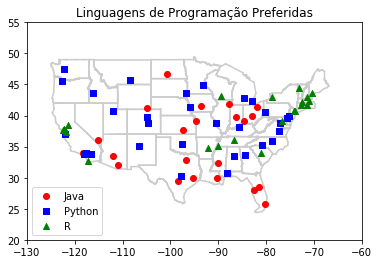

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_state_borders(plt, color='0.8'):
    import re

    segments = []
    points = []

    lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

    with open("Dados/states.txt", "r") as f:
        lines = [line for line in f]

    for line in lines:
        if line.startswith("</state>"):
            for p1, p2 in zip(points, points[1:]):
                segments.append((p1, p2))
            points = []
        s = re.search(lat_long_regex, line)
        if s:
            lat, lon = s.groups()
            points.append((float(lon), float(lat)))
            
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)
        
# A chave é a linguagem, o valor são as coordenadas        
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# queremos que cada linguagem tenha marcador e cor diferentes
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
# cria uma série de dispersão para cada linguagem
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                label=language, zorder=10)
    
plot_state_borders(plt)

plt.legend()
plt.axis([-130,-60,20,55]) # ajusta os eixos

plt.title("Linguagens de Programação Preferidas")
plt.show()

* Já que os lugares mais próximos tendem a gostar da mesma linguagem, KNN parece ser uma boa escolha de modelo.
* Vejamos o que acontece se tentarmos prever a linguagem preferida de cada cidade usando os seus vizinhos:

In [39]:
# tenta vários valores diferentes para k
for k in [1, 3, 5, 7, 9]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city 
                        for other_city in cities 
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1
        
    print (k, "vizinho[s]:", num_correct, "corretos de", len(cities))

1 vizinho[s]: 40 corretos de 75
3 vizinho[s]: 44 corretos de 75
5 vizinho[s]: 41 corretos de 75
7 vizinho[s]: 35 corretos de 75
9 vizinho[s]: 31 corretos de 75


* 3 vizinhos mais próximos tem um melhor desempenho com acerto em 59% das vezes.
* podemos ver quais regiões seriam classificadas para quais linguagens dentro do esquema NN.
* Classificaremos uma rede inteira de pontos e então iremos demarcar:

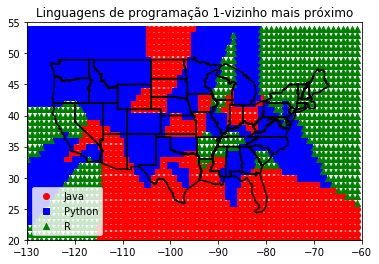

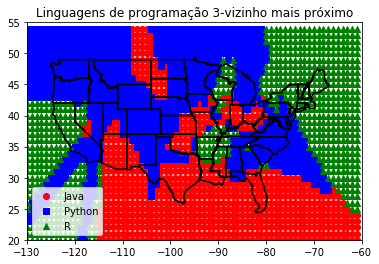

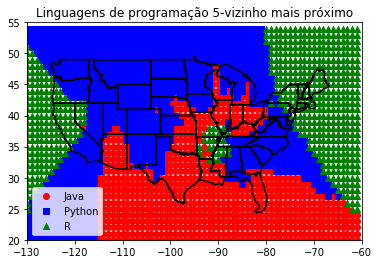

In [47]:
def plot_grafico(k):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                    label=language, zorder=0)

    plot_state_borders(plt, color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Linguagens de programação {}-vizinho mais próximo".format(k))
    plt.show()

for k in [1,3,5]:
    plot_grafico(k)

* Neste exemplo, as dimensões são bastante comparáveis, mas se não fossem, talvez seria necessário redimensionar os dados.

### A Maldição da dimensionalidade

* O KNN entra em perigo em dimensões mais altas graças à "Maldição da Dimensionalidade".
  * Espaços de alta dimensão são vastos.
  * Pontos em espaços de alta dimensão tendem a não ser próximos.
  
  
* Uma maneira de observar isso é gerar pares de pontos aleatórios na “unidade cubo” d-dimensional em uma variedade de dimensões e calcular a distância entre eles.
* Para cada dimensão de 1 a 100, computaremos 10.000 distâncias e as usaremos para computar a distância média entre os pontos e a distância mínima entre os pontos de cada dimensão.

In [50]:
import random

def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

dimensions = range(1, 101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000) # 10.000 pares aleatórios
    avg_distances.append(mean(distances)) # rastreia a média
    min_distances.append(min(distances)) # rastreia o mínimo

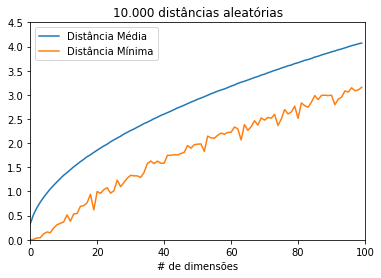

In [54]:
plt.plot(avg_distances, label="Distância Média")
plt.plot(min_distances, label="Distância Mínima")
plt.axis([0,100,0,4.5])
plt.legend()
plt.title("10.000 distâncias aleatórias")
plt.xlabel("# de dimensões")
plt.show()

* Conforme o número de dimensões aumenta, a distância média entre os pontos também aumenta.
* Entretanto, a relação entre a distância mais próxima e a média é o que preocupa:

In [55]:
min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

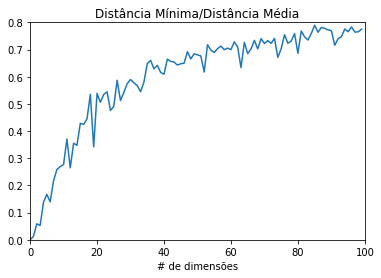

In [57]:
plt.plot(min_avg_ratio)
plt.axis([0,100,0,0.8])
plt.title("Distância Mínima/Distância Média")
plt.xlabel("# de dimensões")
plt.show()

* Em conjuntos de dados de baixa dimensão, os pontos mais próximos tendem a ser mais próximos do que a média.
* Mas os dois pontos estão próximos somente se eles estiverem próximos em todas as dimensões.
* Quando há muitas dimensões, é provável que os pontos mais próximos não sejam tão próximos quanto a média, o que significa que dois pontos estarem próximos não significa muita coisa.
* Uma forma diferente de pensar sobre o problema envolve a dispersão de espaços de alta dimensão. Quanto mais dimensões, menos cobertura.
* Então, se você estiver tentando usar os vizinhos mais próximos em uma dimensão mais alta, é provavelmente uma boa ideia fazer uma redução de dimensionalidade primeiro.